In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source and Contents

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [4]:
print(df.shape)

(48842, 11)


#Q1. Why does it make sense to discretize columns for this problem? 
The values for each of the variables have too little difference - one unit of increase may not attribute to segmenting the variables. By binning the data, there are clearer distinctions between the lvels. 

#Q2. What might be the issues (if any) if we DID NOT discretize the columns 
There could be potential outliers or unaccounted data for our insights. Any un-discretized data can lead to overfitting or it could become very messy to interpret.

# Data Quality Analysis

In [5]:
## check for missing values
print(df.isnull().sum())
#there is no missing values so it is okay

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


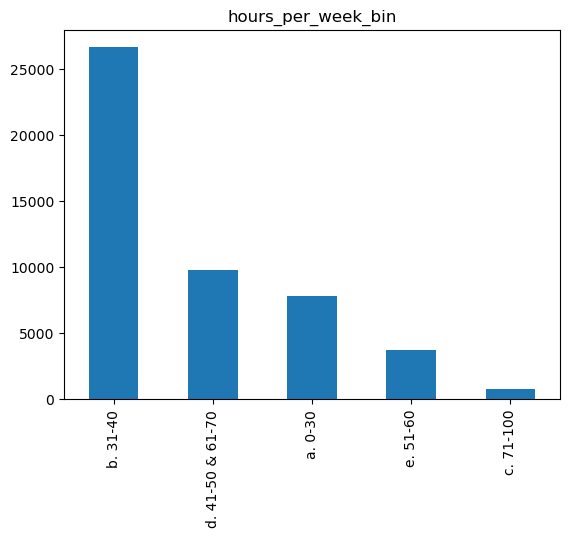

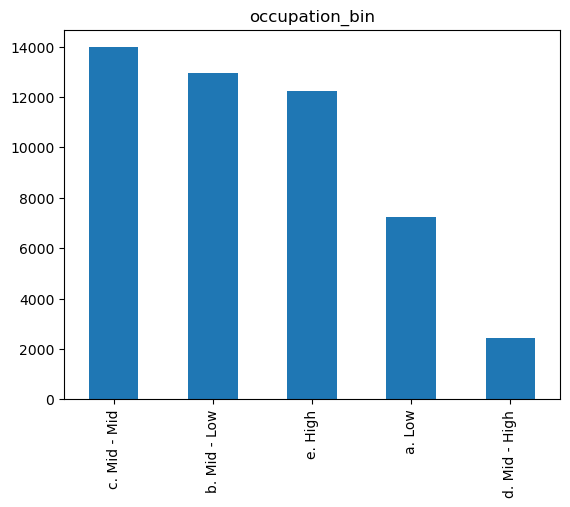

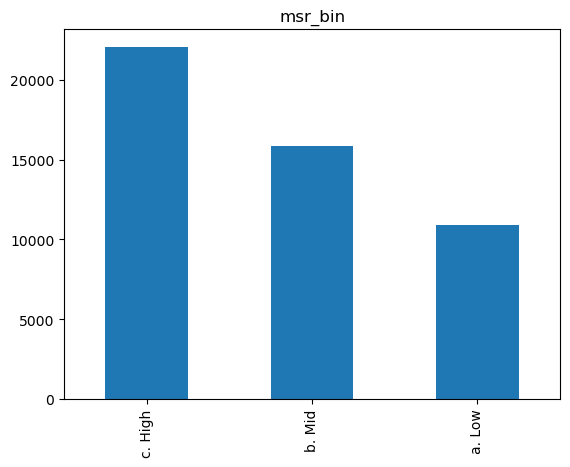

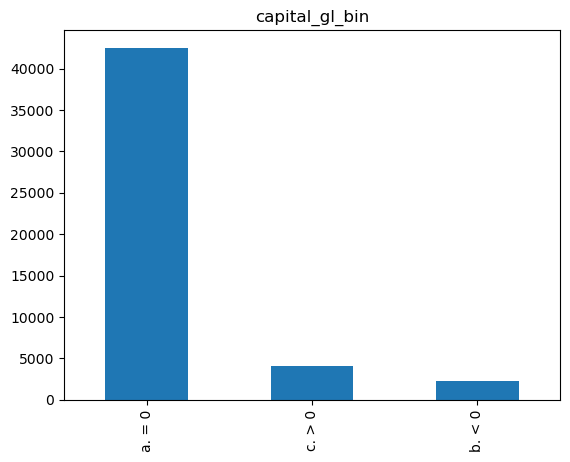

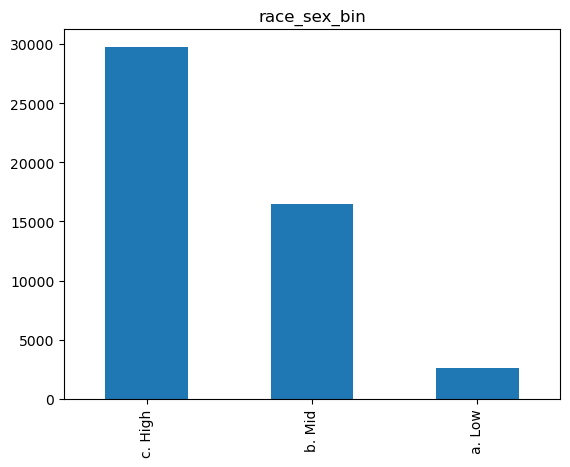

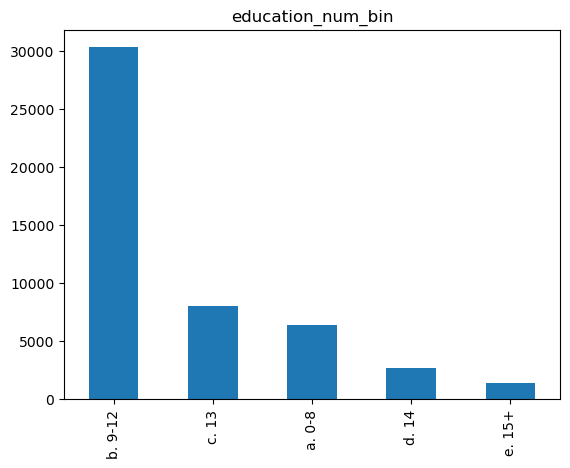

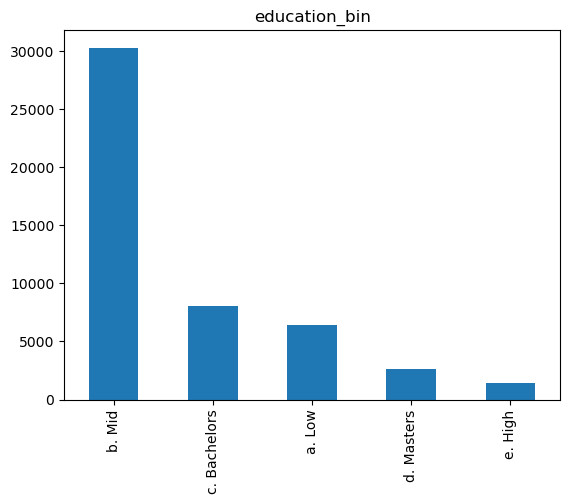

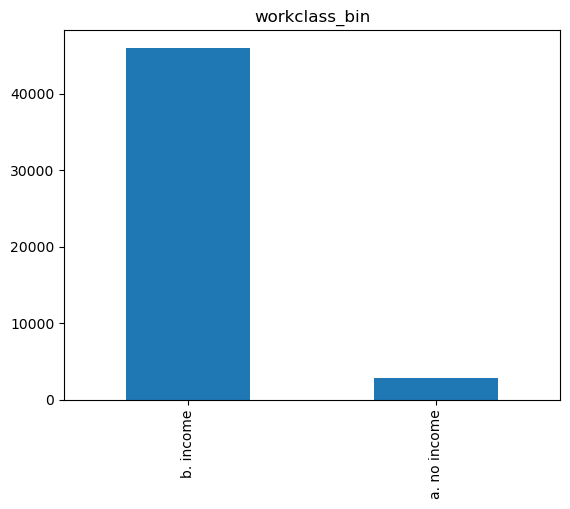

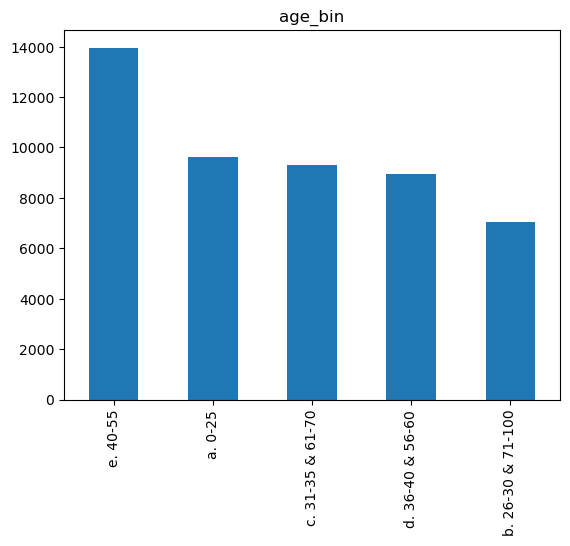

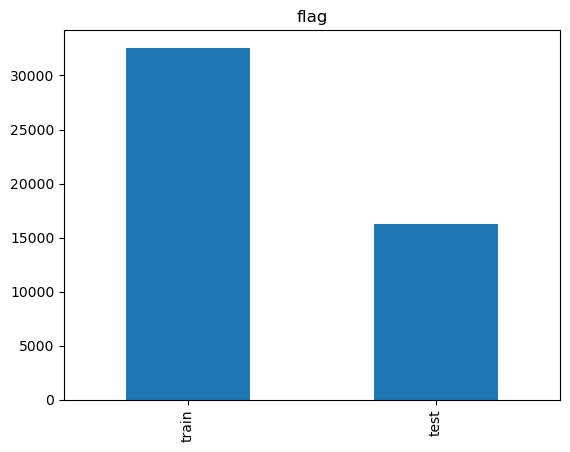

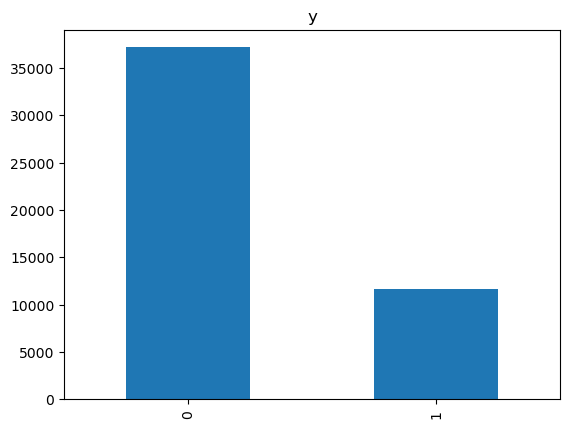

In [6]:
## visualize the distribution of a categorical column
vars = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin',
        'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y']

for x in vars:
    df[x].value_counts().plot(kind='bar')
    plt.title(x)
    plt.show()

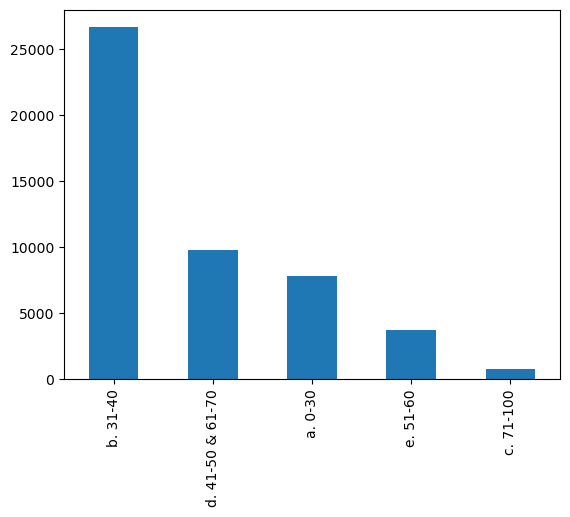

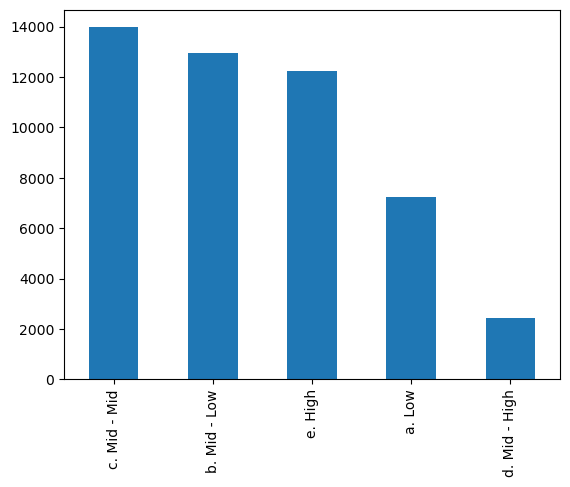

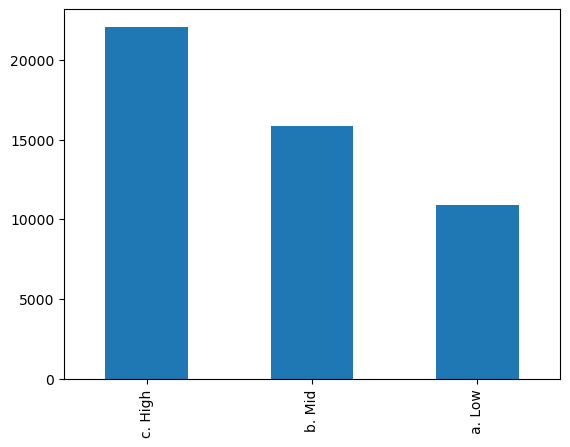

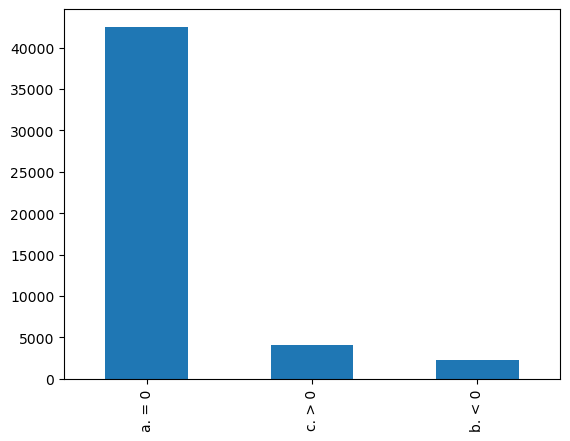

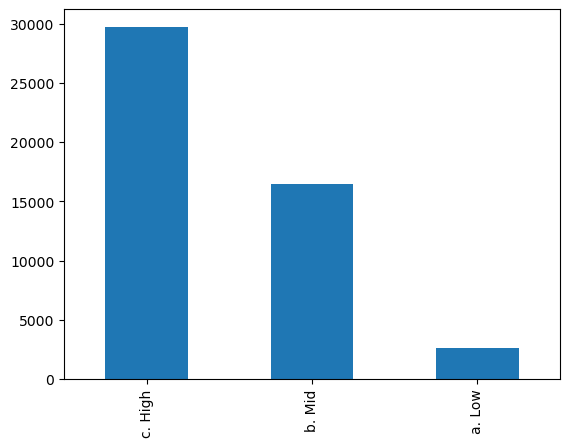

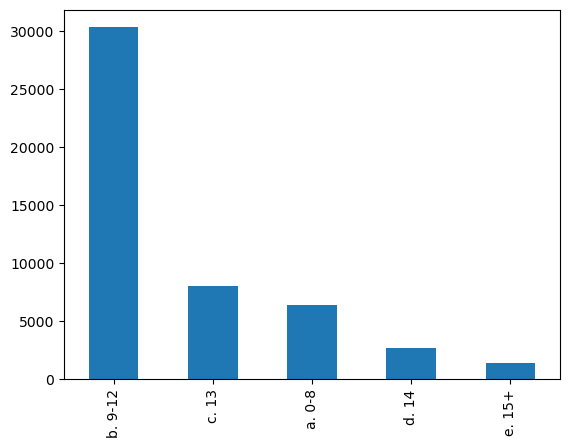

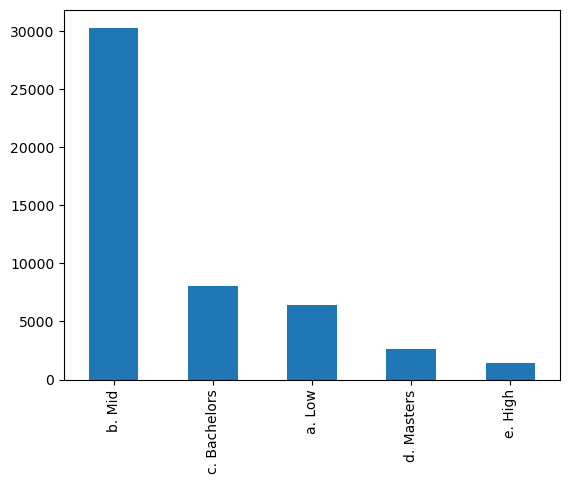

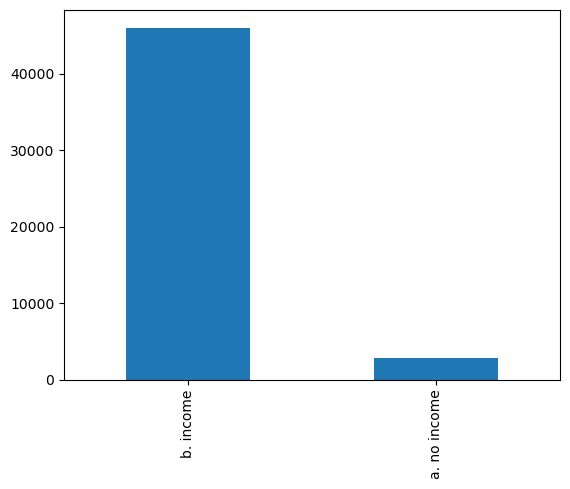

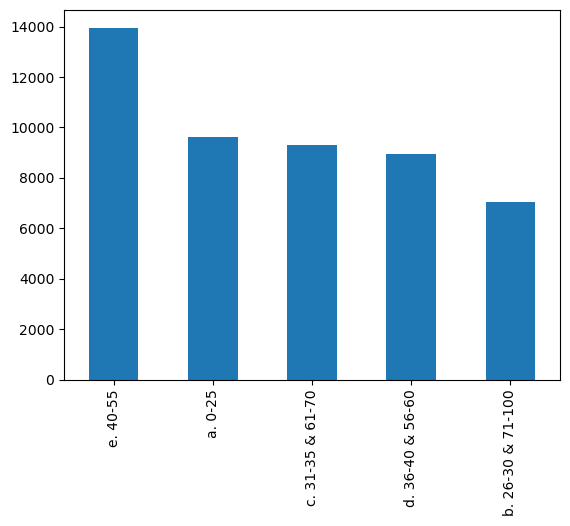

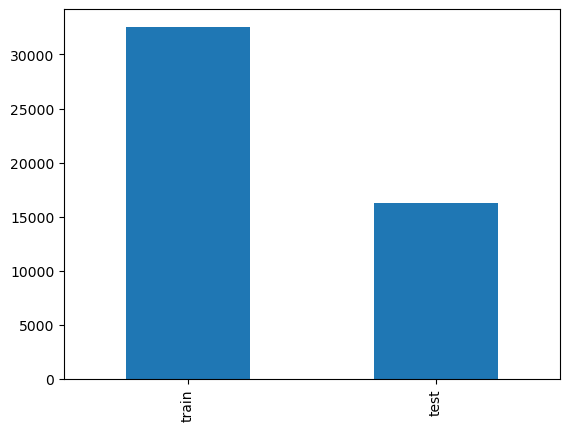

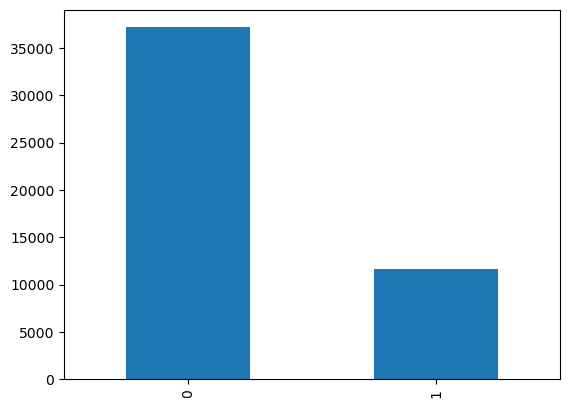

In [7]:
## visualize the distribution of a categorical column
for x in vars:
    df[x].value_counts().plot(kind='bar')
    plt.show()

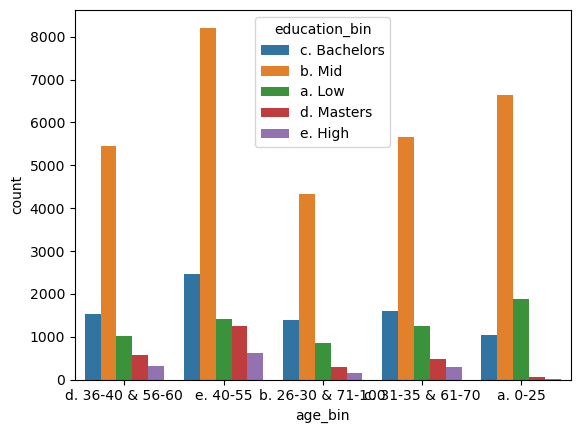

In [8]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='age_bin', hue='education_bin', data=df)
plt.show()

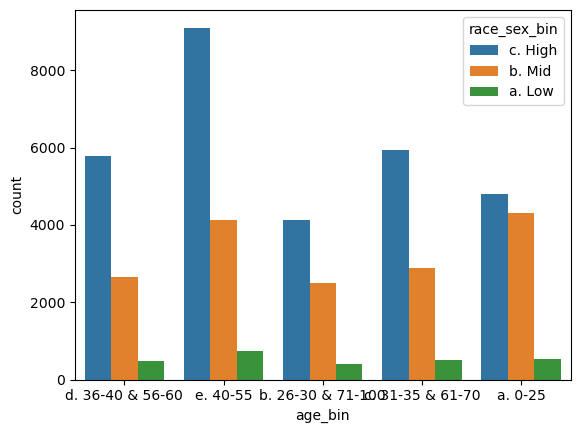

In [9]:
sns.countplot(x='age_bin', hue='race_sex_bin', data=df)
plt.show()

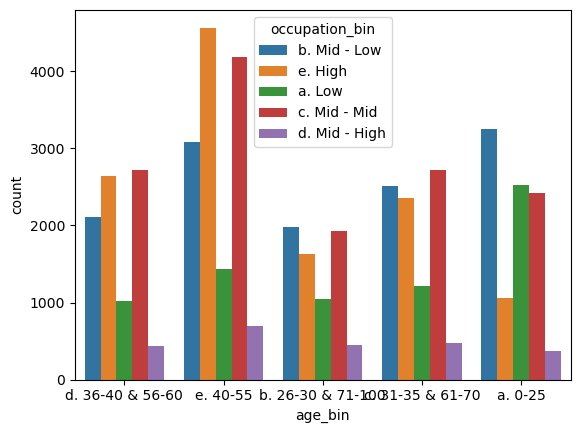

In [10]:
sns.countplot(x='age_bin', hue='occupation_bin', data=df)
plt.show()

# Build Decision Tree Classifier Models

In [11]:
#Splitting the data into test and train 
train_data = df[df['flag']== 'train']
test_data = df[df['flag']== 'test']

In [12]:
x_train = pd.get_dummies(train_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin']], prefix=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin'])
x_test = pd.get_dummies(test_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin']], prefix=['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin','education_bin', 'workclass_bin', 'age_bin'])
y_train = pd.get_dummies(train_data[['y']])
y_test = pd.get_dummies(test_data[['y']])

In [13]:
#importing the Naive Bayes algorithm module Gaussian which is used in classification; it assumes that features follow normal distribution
from sklearn.naive_bayes import GaussianNB 

# using Gaussian Naive Bayes Algorithm
model = GaussianNB()

In [14]:
# Training Naive bayes classifier
print ("Training Model using Gaussian Naive Bayes algorithm .....")
t = model.fit(x_train, np.ravel(y_train))
print ("Training completed")

Training Model using Gaussian Naive Bayes algorithm .....
Training completed


In [15]:
#Test the unseen passangers from test dataset
print ("testing trained model to predict Test Data labels")
y_predicted = model.predict(x_test)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:


In [16]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy

from sklearn.metrics import accuracy_score

# Accuracy score is just percentage of correct predictions
print (accuracy_score(y_test, y_predicted))

0.7871752349364289


In [17]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

0.7932386318371915


/Users/amandagodfrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


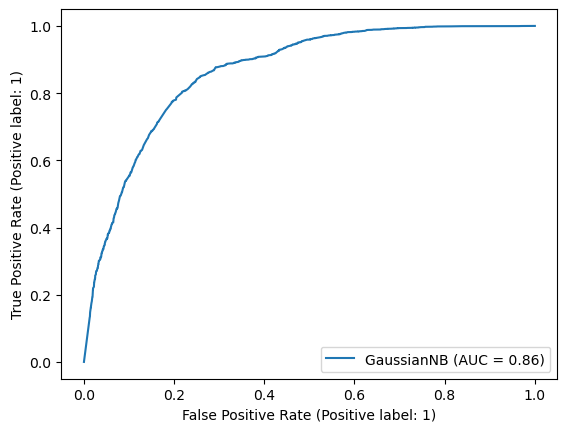

In [18]:
#print roc score 
test_auc = roc_auc_score(y_test, y_predicted)
#ROC AUC Curve
plot_roc_curve(t, x_test, y_test)

print(test_auc)

In [19]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None)
t = t.fit(x_train, y_train)
y_pred=t.predict(x_test)

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


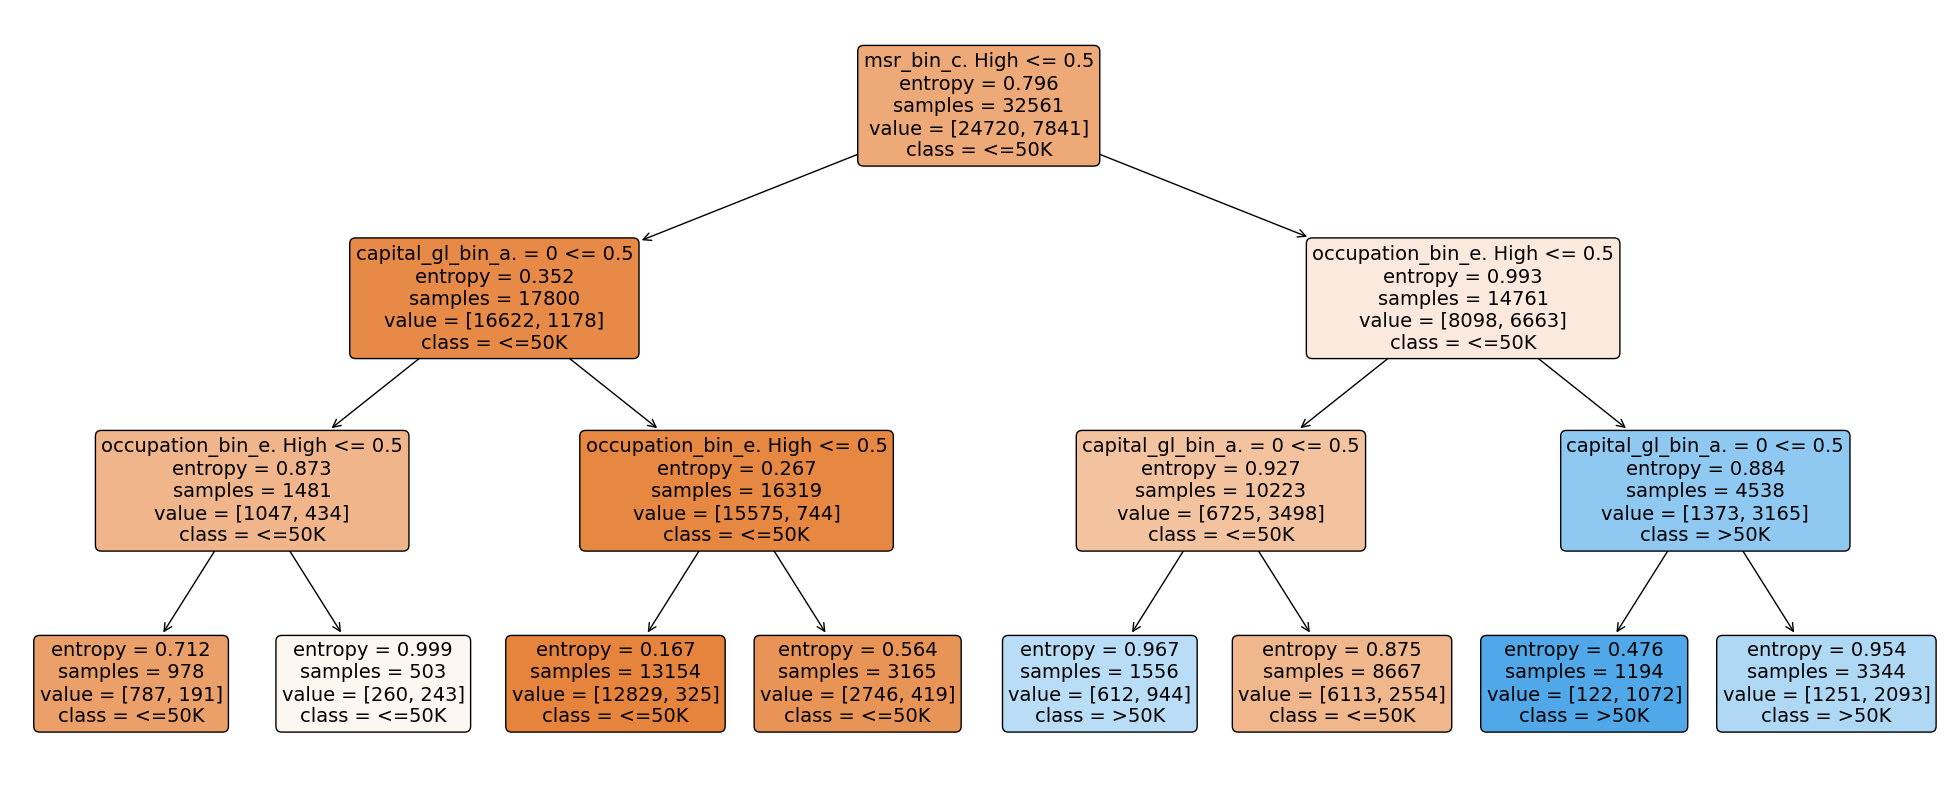

In [21]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(x_train), class_names=['<=50K', '>50K'], 
              filled=True, rounded=True, fontsize=14)

# Evaluate Decision Tree Performance

In [22]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [23]:
df_table = confusion_matrix(y_test, y_predicted)
print (df_table)

[[9721 2714]
 [ 751 3095]]


In [24]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

accuracy_score(y_test,y_predicted) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     12435
           1       0.53      0.80      0.64      3846

    accuracy                           0.79     16281
   macro avg       0.73      0.79      0.74     16281
weighted avg       0.83      0.79      0.80     16281



In [25]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
f = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=42)
f.fit(x_train, np.ravel(y_train))
y_predicted=t.predict(x_test)

In [26]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12435
           1       0.68      0.52      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



In [27]:
from sklearn.ensemble import AdaBoostClassifier

a = AdaBoostClassifier(n_estimators=100)
a.fit(x_train, np.ravel(y_train))
y_predicted=t.predict(x_test)

In [28]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12435
           1       0.68      0.52      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

g = GradientBoostingClassifier(n_estimators=100)
g.fit(x_train,np.ravel(y_train))
y_predicted=t.predict(x_test)

In [30]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12435
           1       0.68      0.52      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281



# Tune Decision Tree Performance

In [31]:
results = []
split_criteria = ['entropy', 'gini']
max_features = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40]
max_depth = [2,4,6,8,10,12,14,16,18,20]
for sc in split_criteria:
    for mf in max_features:
        for msl in min_samples_leaf:
            for md in max_depth:
                model = DecisionTreeClassifier(criterion=sc, max_features=mf, min_samples_leaf=msl, max_depth=md, random_state=42)
                model.fit(x_train, y_train)
                y_pred = model.predict(x_test)
                accuracy = np.mean(np.ravel(y_test)==y_pred)
                results.append([sc, mf, msl, md, accuracy])

In [32]:
#sorted the accuracy by highest and choosing the best parameters
results = pd.DataFrame(results, columns = ['sc', 'mf', 'msl', 'md', 'accuracy'])
sorted_results = results.sort_values(by='accuracy', ascending=False)
sorted_results

,sc,mf,msl,md,accuracy
504,entropy,0.7,15,10,0.846508
595,entropy,0.8,20,12,0.846508
435,entropy,0.6,20,12,0.846447
754,gini,None,20,10,0.845955
594,entropy,0.8,20,10,0.845894
...,...,...,...,...,...
620,entropy,0.8,35,2,0.763774
630,entropy,0.8,40,2,0.763774
1210,gini,0.8,10,2,0.763774
800,gini,0.3,5,2,0.763774


# Visualize Your Best Decision Tree using GraphViz

In [33]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [35]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=10,random_state=101, min_samples_leaf = 15, max_features=0.7)
t = t.fit(x_train, y_train)
y_pred=t.predict(x_test)

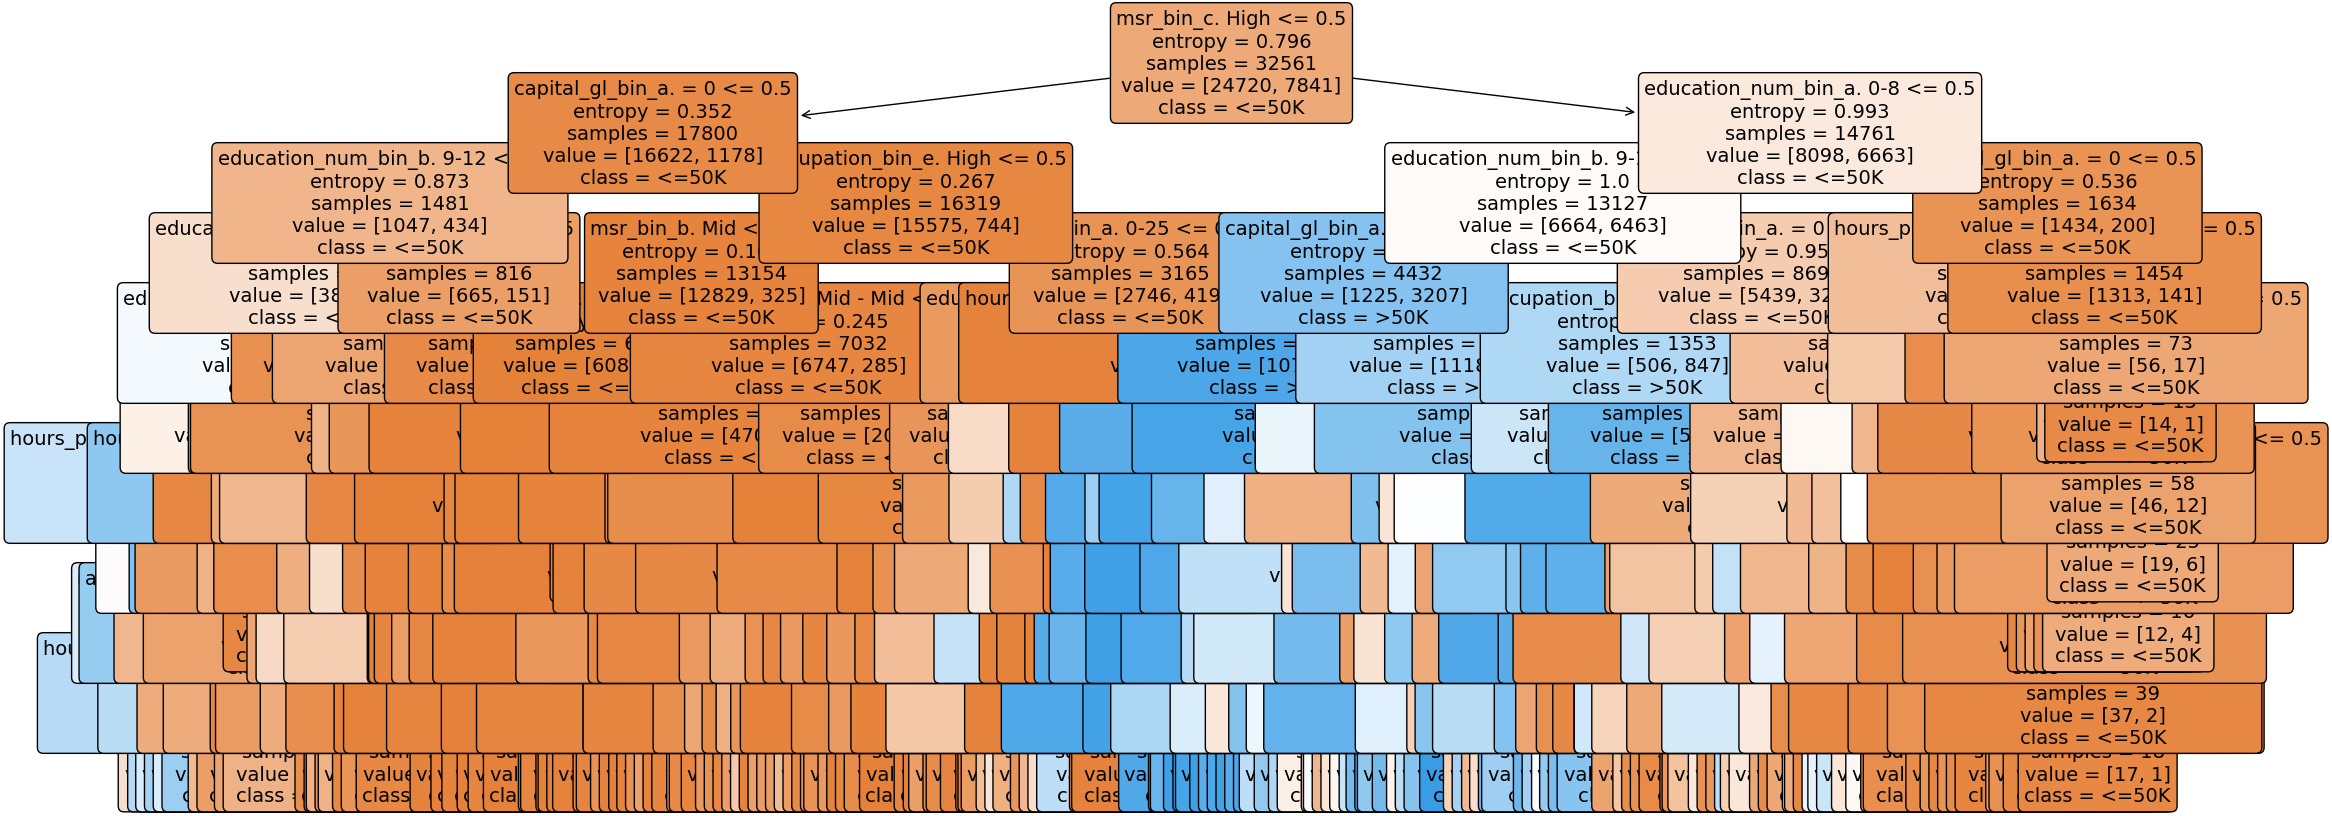

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(x_train), class_names=['<=50K', '>50K'], 
              filled=True, rounded=True, fontsize=14)

# Conclusion

Q.4 How long was your total run time to train the best model?
About sixteen seconds. 
Q.5 Did you find the BEST TREE?
Sorting the accuracy results after looping all the parameters. I then inputed the best parameter numbers into the decision tree classifier. However, I don't think it's the best tree.
Q.6 Write your observations from the visualization of the best tree
There are many boxes, it becomes too hard to view. 
Q.7 Will this Tree “overfit”?
Yes it will overfit. Because there are so many boxes, the model may be too complex and fits the training data too muhch. We would have to apply pruning techniques or adjust the parameters. 

# Prediction using your “trained” Decision Tree Model

In [37]:
data = {'Hours Worked per Week': [48],
        'Occupation Category': ['Mid - Low'],
        'Marriage Status & Relationships': ['High'],
        'Capital Gain': ['Yes'],
        'Race-Sex Group': ['Mid'],
        'Number of Years of Education': [12],
        'Education Category': ['High'],
        'Work Class': ['Income'],
        'Age': [58]}

df2 = pd.DataFrame(data)

Q.8 What is the probability that your prediction for this person is correct?